In [12]:
import os
from pathlib import Path

import numpy as np
import pandas as pd

cwd = os.getcwd()
if cwd.endswith('notebook/PG'):
    os.chdir('../..')
    cwd = os.getcwd()

from src.pg_modelling.ligand_utils import sanitize_ligand_name

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.8)
plt.rcParams['font.family'] = 'Helvetica'

palette = sns.color_palette().as_hex()

In [33]:
pg_modelling_folder = Path(os.path.expanduser('~')) / 'Documents' / 'PG_modelling'
data_folder = pg_modelling_folder / 'Lysostaphin_P10547'
assert data_folder.is_dir()

In [3]:
pg_s_aureus = pd.concat(
    [
        pd.read_excel(
            data_folder / 'S_aureus_cell_wall_library.xlsx',
            sheet_name=0,
        ),
        pd.read_excel(
            data_folder / 'S_aureus_cell_wall_library.xlsx',
            sheet_name=1,
        )
    ],
    ignore_index=True,
)
pg_s_aureus['ligand_id'] = pg_s_aureus['Name'].apply(sanitize_ligand_name)
pg_s_aureus = pg_s_aureus.set_index('ligand_id')
print(f'N = {len(pg_s_aureus):,}')
pg_s_aureus.head()

N = 1,731


,Name,Synonym,Formula,Monoisotopic Mass,Modifications,Degree Amidation,Degree Acetylation,Ontology,PGN Units,Glycan Units,...,Peptide,SMILES,INCHIKEY,clogP,RT,[M+H]+,[M+Na]+,[M+K]+,[M+2H]2+,[M+3H]3+
ligand_id,,,,,,,,,,,,,,,,,,,,,
K-3-NH2-GGAGG,None-K[3-NH2-GGAGG],None--Lys[3--NH2--Gly.Gly.Ala.Gly.Gly],C17H31N7O7,445.22850,EPase P2,0,0,P3--S5,1,0,...,K[3-NH2-GGAGG],CC(NC(=O)CNC(=O)CN)C(=O)NCC(=O)NCC(=O)NCCCCC(N...,QTPFCZZQBOJGEK-UHFFFAOYSA-N,-4.5032,0,446.23578,468.21772,484.19166,223.62153,149.41678
qK-3-NH2-GGAGG,None-qK[3-NH2-GGAGG],None--γ-isoGln.Lys[3--NH2--Gly.Gly.Ala.Gly.Gly],C22H39N9O9,573.28707,EPase P1,1,0,P3--S5,1,0,...,qK[3-NH2-GGAGG],CC(NC(=O)CNC(=O)CN)C(=O)NCC(=O)NCC(=O)NCCCCC(N...,JKAQGRXFSWMSGH-UHFFFAOYSA-N,-5.7529,0,574.29435,596.27629,612.25023,287.65082,192.10297
AqK,None-AqK,None--Ala.γ-isoGln.Lys,C14H27N5O5,345.20122,Amidase,1,0,P3,1,0,...,AqK,CC(N)C(=O)NC(CCC(=O)NC(CCCCN)C(=O)O)C(N)=O,ZMNMLXTWGBPAQE-UHFFFAOYSA-N,-2.2177,0,346.20850,368.19044,384.16438,173.60789,116.07435
AqK-3-NH2-GGAGG,None-AqK[3-NH2-GGAGG],None--Ala.γ-isoGln.Lys[3--NH2--Gly.Gly.Ala.Gly...,C25H44N10O10,644.32419,Amidase,1,0,P3--S5,1,0,...,AqK[3-NH2-GGAGG],CC(N)C(=O)NC(CCC(=O)NC(CCCCNC(=O)CNC(=O)CNC(=O...,RPFFOSHAHRWOBP-UHFFFAOYSA-N,-6.2482,0,645.33147,667.31341,683.28735,323.16938,215.78201
AqK-3-NH2-GGSGG,None-AqK[3-NH2-GGSGG],None--Ala.γ-isoGln.Lys[3--NH2--Gly.Gly.Ser.Gly...,C25H44N10O11,660.31910,Amidase,1,0,P3--S5,1,0,...,AqK[3-NH2-GGSGG],CC(N)C(=O)NC(CCC(=O)NC(CCCCNC(=O)CNC(=O)CNC(=O...,MSASYCJULRNIJQ-UHFFFAOYSA-N,-7.2758,0,661.32638,683.30832,699.28226,331.16683,221.11365


In [ ]:
subset_ids = [
    'AqKA',
    'NAG-NAM',
    'NAG-NAM-AqKA',
    'NAG-NAM-AqKA-3-NH2-GGGGG',
    'NAG-NAM-AqKA-3-NH2-GGSGG',
    'NAG-NAM-AqKA-3-NH2-GGAGG',
    'KA-3-NH2-GGGGG-3br-4-AqKA',
    'KA-3-NH2-GGSGG-3br-4-AqKA',
    'KA-3-NH2-GGAGG-3br-4-AqKA',
]
pg_subset = pg_s_aureus.loc[subset_ids].rename(columns={
    'SMILES': 'smiles' 
})[['smiles']]
pg_subset
pg_subset.to_csv(data_folder / 'ligands__old.csv')
print(f'N = {len(pg_subset):,}')
pg_subset

N = 9


,smiles
ligand_id,
AqKA,CC(N)C(=O)NC(CCC(=O)NC(CCCCN)C(=O)NC(C)C(=O)O)...
NAG-NAM,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
NAG-NAM-AqKA,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
NAG-NAM-AqKA-3-NH2-GGGGG,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
NAG-NAM-AqKA-3-NH2-GGSGG,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
NAG-NAM-AqKA-3-NH2-GGAGG,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
KA-3-NH2-GGGGG-3br-4-AqKA,CC(N)C(=O)NC(CCC(=O)NC(CCCCN)C(=O)NC(C)C(=O)NC...
KA-3-NH2-GGSGG-3br-4-AqKA,CC(N)C(=O)NC(CCC(=O)NC(CCCCN)C(=O)NC(C)C(=O)NC...
KA-3-NH2-GGAGG-3br-4-AqKA,CC(N)C(=O)NC(CCC(=O)NC(CCCCN)C(=O)NC(C)C(=O)NC...


## Results

In [13]:
ligand_to_mass = np.log10(pg_s_aureus.loc[subset_ids]['Monoisotopic Mass'])
ligand_to_mass

ligand_id
AqKA                         2.619342
NAG-NAM                      2.695648
NAG-NAM-AqKA                 2.951541
NAG-NAM-AqKA-3-NH2-GGGGG     3.071707
NAG-NAM-AqKA-3-NH2-GGSGG     3.082619
NAG-NAM-AqKA-3-NH2-GGAGG     3.076837
KA-3-NH2-GGGGG-3br-4-AqKA    2.954473
KA-3-NH2-GGSGG-3br-4-AqKA    2.968711
KA-3-NH2-GGAGG-3br-4-AqKA    2.961181
Name: Monoisotopic Mass, dtype: float64

In [19]:
def sort_and_drop_duplicates(df):
    out_df = df.sort_values(
        [
            'protein_name', 'ligand_name', 'posebusters_score', 'aev_plig_pK', 'confidence',
        ],
        ascending=False,
    ).drop_duplicates(
        ['protein_name', 'ligand_name']
    ).set_index('ligand_name')

    out_df['mass_log'] = [ligand_to_mass[l] for l in out_df.index]
    out_df['aev_plig_pK_norm'] = [
        np.round(out_df.loc[l, 'aev_plig_pK'] / ligand_to_mass[l], 3) for l in out_df.index
    ]

    return out_df.sort_values(
        [
            'posebusters_score', 'aev_plig_pK', 'confidence',
        ],
        ascending=False
    )

### AF3

In [20]:
af3_results_all = pd.read_csv(data_folder / 'modelling__old' / 'af3' / 'scores.csv')
af3_results = sort_and_drop_duplicates(af3_results_all)
af3_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK,mass_log,aev_plig_pK_norm
ligand_name,,,,,,,,,,,,,
NAG-NAM-AqKA-3-NH2-GGAGG,Lysostaphin_P10547_SH3b_413_493,38,0,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.89,0.85,0.858,20,2.4,NaN,5.80,3.076837,1.885
NAG-NAM-AqKA,Lysostaphin_P10547_SH3b_413_493,863,0,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.80,0.64,0.672,20,3.6,NaN,5.70,2.951541,1.931
KA-3-NH2-GGAGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,344,0,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.85,0.74,0.762,20,50.2,NaN,5.62,2.961181,1.898
NAG-NAM-AqKA-3-NH2-GGSGG,Lysostaphin_P10547_SH3b_413_493,867,1,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.76,0.61,0.640,20,5.1,NaN,5.61,3.082619,1.820
NAG-NAM-AqKA-3-NH2-GGGGG,Lysostaphin_P10547_SH3b_413_493,566,1,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.73,0.55,0.586,20,5.1,NaN,5.58,3.071707,1.817
KA-3-NH2-GGGGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,575,4,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.86,0.79,0.804,20,4.0,NaN,5.53,2.954473,1.872
KA-3-NH2-GGSGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,720,2,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.85,0.75,0.770,20,4.3,NaN,5.51,2.968711,1.856
AqKA,Lysostaphin_P10547_SH3b_413_493,102,1,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.92,0.90,0.904,20,4.3,NaN,5.41,2.619342,2.065
NAG-NAM,Lysostaphin_P10547_SH3b_413_493,776,4,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.85,0.68,0.714,20,3.2,NaN,5.08,2.695648,1.885


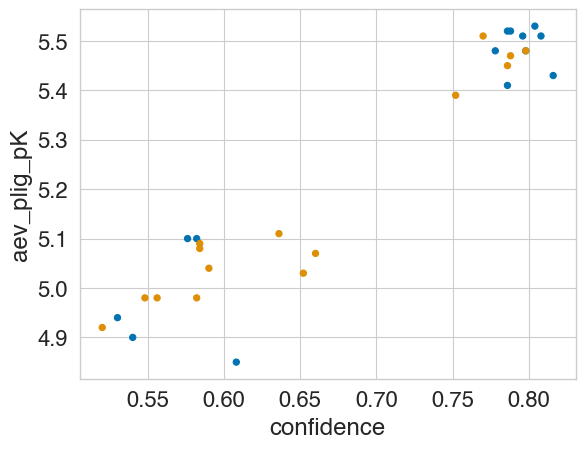

In [25]:
df = af3_results_all[
    af3_results_all['posebusters_score'] == 20
].set_index('ligand_name').loc[['KA-3-NH2-GGGGG-3br-4-AqKA', 'KA-3-NH2-GGSGG-3br-4-AqKA']]
ligands = sorted(set(df.index))
colors = {
    l: palette[i]
    for i, l in enumerate(ligands)
}
df.plot.scatter(
    x='confidence', 
    y='aev_plig_pK',
    c=[colors[l] for l in df.index]
);

### Boltz

In [ ]:
boltz_results_all = pd.read_csv(data_folder / 'modelling__old' / 'boltz' / 'scores.csv')
boltz_results = sort_and_drop_duplicates(boltz_results_all)
boltz_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK,mass_log,aev_plig_pK_norm
ligand_name,,,,,,,,,,,,,
NAG-NAM-AqKA,Lysostaphin_P10547_SH3b_413_493,643,1,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.805153,0.609669,0.649,20,3.0,NaN,5.72,2.951541,1.938
NAG-NAM-AqKA-3-NH2-GGSGG,Lysostaphin_P10547_SH3b_413_493,578,2,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.716387,0.488533,0.534,20,3.8,NaN,5.65,3.082619,1.833
NAG-NAM-AqKA-3-NH2-GGGGG,Lysostaphin_P10547_SH3b_413_493,578,2,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.740353,0.528291,0.571,20,4.1,NaN,5.63,3.071707,1.833
NAG-NAM-AqKA-3-NH2-GGAGG,Lysostaphin_P10547_SH3b_413_493,578,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.716699,0.489049,0.535,20,4.9,NaN,5.61,3.076837,1.823
KA-3-NH2-GGSGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,643,1,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.746930,0.471154,0.526,20,8.1,NaN,5.27,2.968711,1.775
KA-3-NH2-GGGGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,643,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.689487,0.334213,0.405,20,6.4,NaN,5.26,2.954473,1.780
KA-3-NH2-GGAGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,641,4,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.695719,0.354622,0.423,20,4.4,NaN,5.23,2.961181,1.766
NAG-NAM,Lysostaphin_P10547_SH3b_413_493,641,4,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.871496,0.640876,0.687,20,4.9,NaN,5.12,2.695648,1.899
AqKA,Lysostaphin_P10547_SH3b_413_493,641,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.830384,0.475770,0.547,20,5.1,NaN,4.90,2.619342,1.871


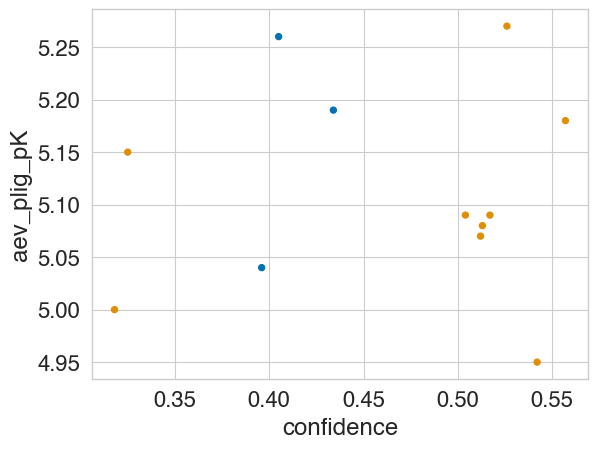

In [26]:
df = boltz_results_all[
    boltz_results_all['posebusters_score'] == 20
].set_index('ligand_name').loc[['KA-3-NH2-GGGGG-3br-4-AqKA', 'KA-3-NH2-GGSGG-3br-4-AqKA']]
ligands = sorted(set(df.index))
colors = {
    l: palette[i]
    for i, l in enumerate(ligands)
}
df.plot.scatter(
    x='confidence', 
    y='aev_plig_pK',
    c=[colors[l] for l in df.index]
);

### Chai

In [ ]:
chai_results_all = pd.read_csv(data_folder / 'modelling__old' / 'chai' / 'scores.csv')
chai_results = sort_and_drop_duplicates(chai_results_all)
chai_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK,mass_log,aev_plig_pK_norm
ligand_name,,,,,,,,,,,,,
NAG-NAM-AqKA-3-NH2-GGAGG,Lysostaphin_P10547_SH3b_413_493,773,4,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.891681,0.747972,0.777,20,2.8,NaN,5.64,3.076837,1.833
NAG-NAM-AqKA,Lysostaphin_P10547_SH3b_413_493,20,1,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.917145,0.778748,0.806,20,2.6,NaN,5.54,2.951541,1.877
NAG-NAM-AqKA-3-NH2-GGGGG,Lysostaphin_P10547_SH3b_413_493,20,1,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.879673,0.737133,0.766,20,2.8,NaN,5.53,3.071707,1.800
NAG-NAM-AqKA-3-NH2-GGSGG,Lysostaphin_P10547_SH3b_413_493,773,3,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.892709,0.747563,0.777,20,3.0,NaN,5.48,3.082619,1.778
KA-3-NH2-GGGGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,156,2,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.785629,0.424613,0.497,20,3.7,NaN,5.21,2.954473,1.763
KA-3-NH2-GGAGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,773,1,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.798854,0.466510,0.533,20,3.7,NaN,5.17,2.961181,1.746
KA-3-NH2-GGSGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,20,2,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.782097,0.429692,0.500,20,3.5,NaN,5.10,2.968711,1.718
AqKA,Lysostaphin_P10547_SH3b_413_493,20,1,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.950384,0.816767,0.843,20,2.6,NaN,5.03,2.619342,1.920
NAG-NAM,Lysostaphin_P10547_SH3b_413_493,156,3,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.855238,0.359675,0.459,20,2.5,NaN,4.90,2.695648,1.818


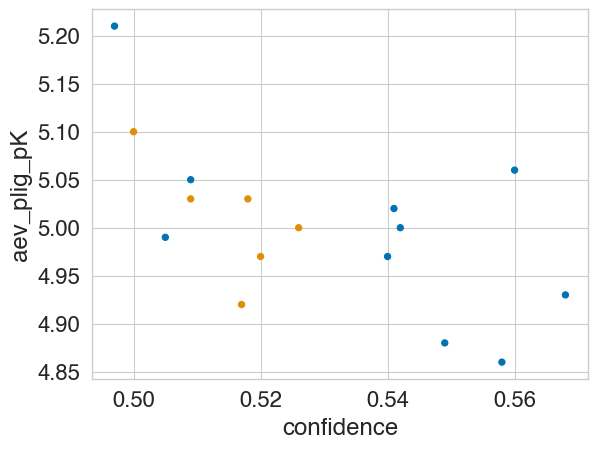

In [27]:
df = chai_results_all[
    chai_results_all['posebusters_score'] == 20
].set_index('ligand_name').loc[['KA-3-NH2-GGGGG-3br-4-AqKA', 'KA-3-NH2-GGSGG-3br-4-AqKA']]
ligands = sorted(set(df.index))
colors = {
    l: palette[i]
    for i, l in enumerate(ligands)
}
df.plot.scatter(
    x='confidence', 
    y='aev_plig_pK',
    c=[colors[l] for l in df.index]
);

In [31]:
chai_results_all.set_index('ligand_name').loc['KA-3-NH2-GGSGG-3br-4-AqKA'].head()

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK
ligand_name,,,,,,,,,,,
KA-3-NH2-GGSGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,20,2,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.782097,0.429692,0.500,20,3.5,NaN,5.10
KA-3-NH2-GGSGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,20,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.791774,0.449717,0.518,20,3.4,NaN,5.03
KA-3-NH2-GGSGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,773,1,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.779446,0.441588,0.509,20,6.7,NaN,5.03
KA-3-NH2-GGSGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,156,1,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.793330,0.459736,0.526,20,5.1,NaN,5.00
KA-3-NH2-GGSGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,156,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.789823,0.452117,0.520,20,3.4,NaN,4.97


### Protenix

In [23]:
protenix_results_all = pd.read_csv(data_folder / 'modelling__old' / 'protenix' / 'scores.csv')
protenix_results = sort_and_drop_duplicates(protenix_results_all)
protenix_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK,mass_log,aev_plig_pK_norm
ligand_name,,,,,,,,,,,,,
NAG-NAM-AqKA-3-NH2-GGGGG,Lysostaphin_P10547_SH3b_413_493,461,3,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.950882,0.921236,0.927,20,5.1,NaN,5.56,3.071707,1.810
NAG-NAM-AqKA-3-NH2-GGAGG,Lysostaphin_P10547_SH3b_413_493,72,1,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.954521,0.929136,0.934,20,7.8,NaN,5.50,3.076837,1.788
NAG-NAM-AqKA,Lysostaphin_P10547_SH3b_413_493,461,3,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.964065,0.942224,0.947,20,2.9,NaN,5.48,2.951541,1.857
NAG-NAM-AqKA-3-NH2-GGSGG,Lysostaphin_P10547_SH3b_413_493,72,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.960558,0.938245,0.943,20,3.4,NaN,5.38,3.082619,1.745
KA-3-NH2-GGAGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,461,2,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.944306,0.891565,0.902,20,11.3,NaN,5.23,2.961181,1.766
KA-3-NH2-GGSGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,555,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.956275,0.919312,0.927,20,4.1,NaN,5.00,2.968711,1.684
NAG-NAM,Lysostaphin_P10547_SH3b_413_493,461,2,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.974854,0.959846,0.963,20,22.3,NaN,4.96,2.695648,1.840
KA-3-NH2-GGGGG-3br-4-AqKA,Lysostaphin_P10547_SH3b_413_493,555,2,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.945204,0.891784,0.902,20,11.6,NaN,4.94,2.954473,1.672
AqKA,Lysostaphin_P10547_SH3b_413_493,72,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.972135,0.948913,0.954,20,4.9,NaN,4.93,2.619342,1.882


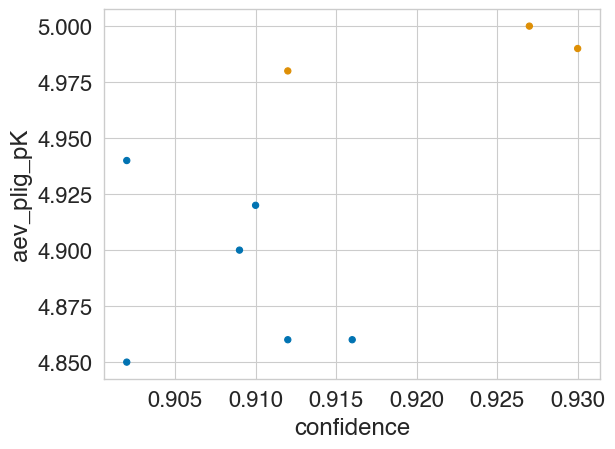

In [28]:
df = protenix_results_all[
    protenix_results_all['posebusters_score'] == 20
].set_index('ligand_name').loc[['KA-3-NH2-GGGGG-3br-4-AqKA', 'KA-3-NH2-GGSGG-3br-4-AqKA']]
ligands = sorted(set(df.index))
colors = {
    l: palette[i]
    for i, l in enumerate(ligands)
}
df.plot.scatter(
    x='confidence', 
    y='aev_plig_pK',
    c=[colors[l] for l in df.index]
);

## Revisited: use negative controls

- Bridge crosslink from S. aureus: pentaglycine (main positive control)
- Bridge crosslink from S. aureus: GGSGG (main negative control)
- Bridge crosslink from S. equi: two Alanine (negative control)
- Direct crosslink from E. coli (negative control)
- Any odd lipid in the same molecular weight ballpark (negative control)

In [34]:
E_coli_libary = pg_modelling_folder / 'PG_library' / 'Escherichia_coli' / 'E_coli_cell_wall_library.xlsx'
S_equi_libary = pg_modelling_folder / 'PG_library' / 'Streptococcus_equi' / 'S_equi_cell_wall_library.xlsx'
S_aureus_libary = pg_modelling_folder / 'PG_library' / 'Staphylococcus_aureus' / 'S_aureus_cell_wall_library.xlsx'

pg_library = pd.concat(
    [
        pd.read_excel(
            E_coli_libary,
            sheet_name=0,
        ),
        pd.read_excel(
            E_coli_libary,
            sheet_name=1,
        ),
        pd.read_excel(
            S_equi_libary,
            sheet_name=0,
        ),
        pd.read_excel(
            S_equi_libary,
            sheet_name=1,
        ),
        pd.read_excel(
            S_aureus_libary,
            sheet_name=0,
        ),
        pd.read_excel(
            S_aureus_libary,
            sheet_name=1,
        ),
    ],
    ignore_index=True,
)
pg_library['ligand_id'] = pg_library['Name'].apply(sanitize_ligand_name)
pg_library = pg_library.drop_duplicates('ligand_id')
pg_library = pg_library.set_index('ligand_id')
print(f'N = {len(pg_library):,}')

N = 2,553


In [35]:
subset_ids = [
    'KA-3-NH2-GGGGG-3br-4-qKA',
    'KA-3-NH2-GGSGG-3br-4-qKA',
    'KA-3-NH2-AA-3br-4-qKA',
    'mA-3s-4-emA',
]
pg_library_subset = pg_library.loc[subset_ids].rename(columns={
    'SMILES': 'smiles' 
})[['smiles']]
print(f'N = {len(pg_library_subset):,}')
pg_library_subset

N = 4


,smiles
ligand_id,
KA-3-NH2-GGGGG-3br-4-qKA,CC(NC(=O)C(N)CCCCNC(=O)CNC(=O)CNC(=O)CNC(=O)CN...
KA-3-NH2-GGSGG-3br-4-qKA,CC(NC(=O)C(N)CCCCNC(=O)CNC(=O)CNC(=O)C(CO)NC(=...
KA-3-NH2-AA-3br-4-qKA,CC(NC(=O)C(N)CCCCNC(=O)C(C)NC(=O)C(C)NC(=O)C(C...
mA-3s-4-emA,CC(NC(=O)C(N)CCCC(NC(=O)C(C)NC(=O)C(CCCC(N)C(=...


In [36]:
# Pick larg-ish lipid from E. coli: (3S)-citryl-CoA
lipid_maps = pd.read_csv(pg_modelling_folder / 'PG_library' / 'lipid_maps' / 'lipids.csv')
lipid_df = lipid_maps[lipid_maps['NAME'] == '(3S)-citryl-CoA'].copy()
lipid_df['ligand_id'] = lipid_df['NAME'].apply(lambda n: f'lipid-{sanitize_ligand_name(n)}')
lipid_df = lipid_df.set_index('ligand_id').rename(columns={
    'SMILES': 'smiles' 
})[['smiles']]

ligands_df = pd.concat([pg_library_subset, lipid_df])
ligands_df.to_csv(data_folder / 'ligands.csv')
print(f'N = {len(ligands_df):,}')
ligands_df

N = 5


,smiles
ligand_id,
KA-3-NH2-GGGGG-3br-4-qKA,CC(NC(=O)C(N)CCCCNC(=O)CNC(=O)CNC(=O)CNC(=O)CN...
KA-3-NH2-GGSGG-3br-4-qKA,CC(NC(=O)C(N)CCCCNC(=O)CNC(=O)CNC(=O)C(CO)NC(=...
KA-3-NH2-AA-3br-4-qKA,CC(NC(=O)C(N)CCCCNC(=O)C(C)NC(=O)C(C)NC(=O)C(C...
mA-3s-4-emA,CC(NC(=O)C(N)CCCC(NC(=O)C(C)NC(=O)C(CCCC(N)C(=...
lipid-3S-citryl-CoA,CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc...
